In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from time import time

## Task 1.1 Spectral and Singular Value Decomposition

In [2]:
# load the data matrix into memory
X = np.load("data/faceMatrix.npy").astype(np.float32)

# normalize the data matrix such that the column mean is zero
# by simply subtracting the mean of each column
X -= X.mean(axis=0, keepdims=True)

# compute covariance matrix
C = X @ X.T
# and the spectral decomposition
V_eig, _ = la.eig(C)
V_eigh, _ = la.eigh(C)

# compute the singular value decomposition
_, s, _ = la.svd(X)
V_svd = s ** 2

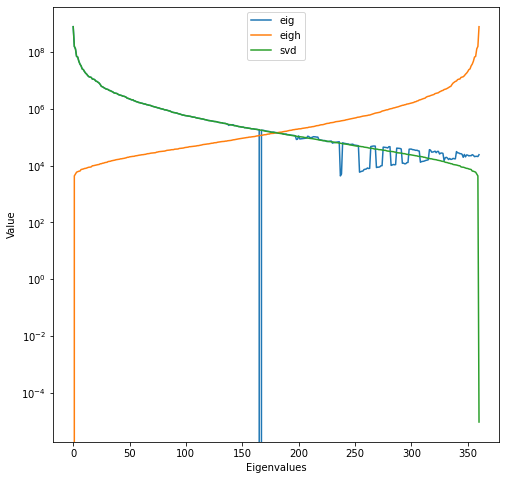

In [3]:
fig , ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set(yscale='log', xlabel='Eigenvalues', ylabel='Value')
ax.plot(V_eig, label='eig')
ax.plot(V_eigh, label='eigh')
ax.plot(V_svd, label='svd')
ax.legend()
fig.savefig("Figures/eig.png")
plt.show()

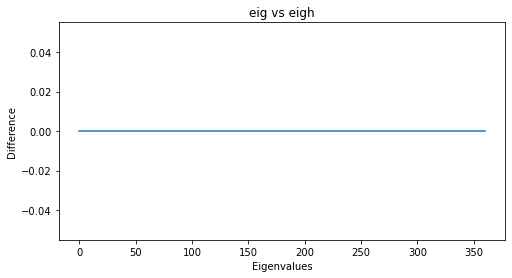

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set(title="eig vs eigh", xlabel="Eigenvalues", ylabel="Difference")
ax.plot(np.sort(V_eig) - np.sort(V_eigh))
fig.savefig("Figures/eig-vs-eigh.png")
plt.show()

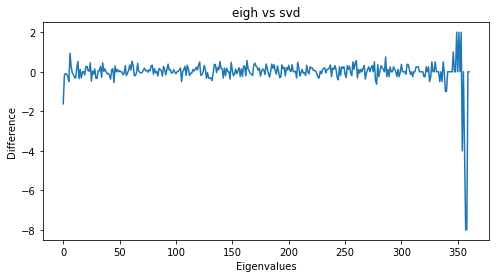

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set(title="eigh vs svd", xlabel="Eigenvalues", ylabel="Difference")
ax.plot(np.sort(V_eigh) - np.sort(V_svd))
fig.savefig("Figures/eigh-vs-svd.png")
plt.show()

## Task 1.2 Timing Measurements

In [5]:
from timeit import timeit
n = 100
eig_time = timeit(lambda: la.eig(X @ X.T), number=n)
eigh_time = timeit(lambda: la.eigh(X @ X.T), number=n)
svd_time = timeit(lambda: la.svd(X)[1] ** 2, number=n)
# print the average time spend for each method
print("la.eig:  %.3fs" % (eig_time / n))
print("la.eigh: %.3fs" % (eigh_time / n))
print("la.svd:  %.3fs" % (svd_time / n))

la.eig:  0.111s
la.eigh: 0.024s
la.svd:  0.741s


## Task 1.3 QR-Algorithm

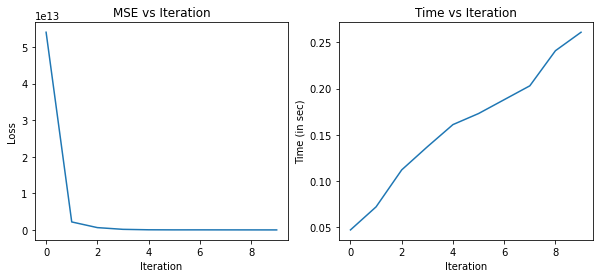

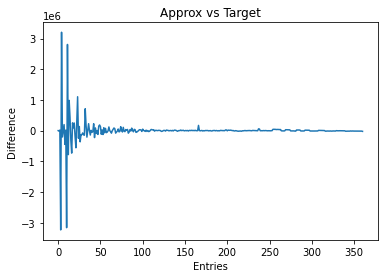

211 ms ± 33 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [9]:
# generator yielding the current approximation
# in each iteration before computing the next one
def qr_alg_generator(A, n=10):
    for _ in range(n):
        Q, R = la.qr(A)
        A = R @ Q
        yield np.diag(A)
# just give me the final approximation
def qr_alg(A, n=10):
    return list(qr_alg_generator(A, n=n))[-1]

# mean squarred error between approximation
# and target eigenvalues over the iterations
loss = []
# time measurements over iterations
times = []

# execute and track loss and time of each iteration
# of the qr algorithm
st = time()
for V_approx in qr_alg_generator(C, n=10):
    # track the time needed for the current iteration
    times.append(time() - st)
    # sort the eigenvalue approximation and
    # compute the mean squarred error
    loss.append(((np.sort(V_approx) - np.sort(V_eig)) ** 2).mean())
    # update start time to ignore the error computation
    # in the timing measurement
    st = time()
    
# plot loss/time vs iterations
fig, (ax_loss, ax_time) = plt.subplots(1, 2, figsize=(10, 4))
ax_loss.set(title="MSE vs Iteration", xlabel="Iteration", ylabel="Loss")
ax_loss.plot(loss)
ax_time.set(title="Time vs Iteration", xlabel="Iteration", ylabel="Time (in sec)")
ax_time.plot(np.cumsum(times))
plt.show()

# plot final approximation error
fig, ax = plt.subplots(1, 1)
ax.set(title="Approx vs Target", xlabel="Entries", ylabel="Difference")
ax.plot(V_approx - V_eig)
plt.show()

# total time measurements
%timeit qr_alg(C, n=10)